In [7]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
import os
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_images(directory_path):
    """Preprocess images from a directory, skipping and removing corrupted files."""
    images = []
    valid_ids = []
    corrupted_files = []
    print(f"Loading images from {directory_path}:")
    
    for file_name in tqdm(os.listdir(directory_path)):
        file_path = os.path.join(directory_path, file_name)
        if file_path.lower().endswith((".jpg", ".jpeg", ".png")):  # Check for valid image extensions
            try:
                # Load and preprocess image
                img = load_img(file_path, target_size=(224, 224))
                img = img_to_array(img) / 255.0  # Normalize
                images.append(img)
                valid_ids.append(os.path.splitext(file_name)[0])  # Extract ID (filename without extension)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")
                corrupted_files.append(file_name)
    
    print(f"Total corrupted images skipped: {len(corrupted_files)}")
    return np.array(images), valid_ids, corrupted_files


Loading images from /kaggle/input/prml-project/front/front: 100%|██████████| 10000/10000 [01:54<00:00, 87.42it/s]
Loading images from /kaggle/input/prml-project/side/side:   0%|          | 14/10000 [00:00<02:21, 70.58it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   2%|▏         | 166/10000 [00:01<01:50, 88.62it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   2%|▏         | 223/10000 [00:02<01:55, 84.93it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   3%|▎         | 279/10000 [00:03<01:48, 89.77it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   4%|▍         | 397/10000 [00:04<01:57, 81.44it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   6%|▌         | 584/10000 [00:06<01:47, 87.20it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   6%|▌         | 602/10000 [00:07<01:50, 84.78it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   6%|▋         | 630/10000 [00:07<01:46, 87.58it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   7%|▋         | 697/10000 [00:08<01:42, 90.92it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   7%|▋         | 747/10000 [00:08<01:41, 90.90it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   8%|▊         | 797/10000 [00:09<01:41, 90.72it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   8%|▊         | 837/10000 [00:09<01:38, 93.49it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:   9%|▉         | 925/10000 [00:10<01:42, 88.85it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  10%|▉         | 972/10000 [00:11<01:52, 80.20it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  10%|▉         | 999/10000 [00:11<01:47, 83.36it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  11%|█         | 1056/10000 [00:12<01:43, 86.17it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  13%|█▎        | 1307/10000 [00:15<01:36, 89.92it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  14%|█▍        | 1431/10000 [00:16<01:34, 90.44it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  16%|█▌        | 1614/10000 [00:18<01:39, 84.04it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  17%|█▋        | 1663/10000 [00:19<01:33, 88.71it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  19%|█▉        | 1928/10000 [00:22<01:37, 82.47it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  20%|█▉        | 1992/10000 [00:22<01:36, 83.31it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  21%|██        | 2084/10000 [00:24<01:33, 84.52it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  23%|██▎       | 2275/10000 [00:26<01:33, 82.63it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  24%|██▍       | 2441/10000 [00:28<01:26, 87.02it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  26%|██▌       | 2578/10000 [00:29<01:25, 87.08it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  26%|██▌       | 2618/10000 [00:30<01:21, 90.26it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  26%|██▋       | 2638/10000 [00:30<01:20, 91.43it/s]

Done Successfully
Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  28%|██▊       | 2818/10000 [00:32<01:24, 84.85it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  29%|██▊       | 2874/10000 [00:33<01:21, 87.76it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  32%|███▏      | 3211/10000 [00:37<01:18, 86.37it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  33%|███▎      | 3305/10000 [00:38<01:15, 88.87it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  34%|███▍      | 3402/10000 [00:39<01:12, 91.48it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  36%|███▌      | 3562/10000 [00:40<01:12, 88.20it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  36%|███▌      | 3602/10000 [00:41<01:09, 92.26it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  36%|███▋      | 3632/10000 [00:41<01:12, 87.32it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  37%|███▋      | 3747/10000 [00:43<01:06, 94.38it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  39%|███▊      | 3868/10000 [00:44<01:06, 92.68it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  40%|███▉      | 3977/10000 [00:45<01:06, 89.90it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  42%|████▏     | 4215/10000 [00:48<01:07, 85.70it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  43%|████▎     | 4290/10000 [00:49<01:04, 88.36it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  44%|████▍     | 4419/10000 [00:50<01:07, 83.21it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  45%|████▍     | 4488/10000 [00:51<00:58, 93.79it/s]

Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  46%|████▌     | 4604/10000 [00:52<00:58, 91.65it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  47%|████▋     | 4740/10000 [00:54<01:04, 81.21it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  48%|████▊     | 4802/10000 [00:55<01:03, 81.68it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  49%|████▊     | 4858/10000 [00:55<01:00, 85.04it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  49%|████▉     | 4900/10000 [00:56<00:53, 94.49it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  51%|█████     | 5081/10000 [00:58<00:58, 83.77it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  51%|█████▏    | 5136/10000 [00:59<00:57, 84.09it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  51%|█████▏    | 5145/10000 [00:59<01:02, 77.48it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  52%|█████▏    | 5171/10000 [00:59<01:00, 79.54it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  53%|█████▎    | 5254/10000 [01:00<00:58, 81.19it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  58%|█████▊    | 5849/10000 [01:07<00:51, 81.23it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  61%|██████    | 6098/10000 [01:10<00:42, 91.72it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  61%|██████▏   | 6147/10000 [01:11<00:42, 91.58it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  62%|██████▏   | 6206/10000 [01:11<00:42, 89.66it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  64%|██████▍   | 6415/10000 [01:14<00:39, 89.91it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  64%|██████▍   | 6445/10000 [01:14<00:37, 94.29it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  65%|██████▍   | 6475/10000 [01:14<00:36, 96.21it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  65%|██████▌   | 6515/10000 [01:15<00:37, 92.36it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  67%|██████▋   | 6659/10000 [01:16<00:39, 85.36it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  67%|██████▋   | 6742/10000 [01:17<00:40, 81.27it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  70%|███████   | 7015/10000 [01:21<00:34, 87.70it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  73%|███████▎  | 7324/10000 [01:24<00:32, 82.10it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  74%|███████▎  | 7352/10000 [01:25<00:30, 86.86it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  77%|███████▋  | 7657/10000 [01:28<00:27, 84.91it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  77%|███████▋  | 7666/10000 [01:29<00:27, 84.59it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  78%|███████▊  | 7786/10000 [01:30<00:26, 85.01it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  81%|████████  | 8115/10000 [01:34<00:21, 87.30it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  84%|████████▎ | 8363/10000 [01:37<00:19, 81.99it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  84%|████████▍ | 8434/10000 [01:38<00:28, 55.64it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  88%|████████▊ | 8799/10000 [01:43<00:13, 85.98it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  89%|████████▉ | 8890/10000 [01:44<00:13, 84.52it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  89%|████████▉ | 8928/10000 [01:44<00:12, 88.13it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  90%|████████▉ | 8966/10000 [01:45<00:11, 87.67it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  91%|█████████ | 9053/10000 [01:45<00:10, 92.13it/s]

Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  91%|█████████ | 9083/10000 [01:46<00:10, 90.49it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  93%|█████████▎| 9332/10000 [01:49<00:08, 81.59it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  94%|█████████▍| 9382/10000 [01:49<00:06, 90.04it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  96%|█████████▌| 9570/10000 [01:52<00:05, 79.49it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  96%|█████████▌| 9608/10000 [01:52<00:04, 86.62it/s]

Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  98%|█████████▊| 9783/10000 [01:54<00:02, 87.98it/s]

Done Successfully
Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  98%|█████████▊| 9808/10000 [01:54<00:01, 104.27it/s]

Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  98%|█████████▊| 9830/10000 [01:55<00:01, 102.82it/s]

Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  99%|█████████▊| 9853/10000 [01:55<00:01, 103.89it/s]

Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  99%|█████████▉| 9875/10000 [01:55<00:01, 90.10it/s] 

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side:  99%|█████████▉| 9905/10000 [01:55<00:01, 93.05it/s]

Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side: 100%|█████████▉| 9962/10000 [01:56<00:00, 85.11it/s]

Done Successfully
Done Successfully


Loading images from /kaggle/input/prml-project/side/side: 100%|██████████| 10000/10000 [01:57<00:00, 85.44it/s]


Done Successfully
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
493/493 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - loss: 68.4332 - mae: 5.9325 - val_loss: 24.4857 - val_mae: 3.7437
Epoch 2/5
493/493 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - loss: 35.7259 - mae: 4.5927 - val_loss: 31.7532 - val_mae: 4.2998
Epoch 3/5
493/493 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - loss: 33.8242 - mae: 4.5305 - val_loss: 21.0764 - val_mae: 3.6073
Epoch 4/5
493/493 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - loss: 34.7897 - mae: 4.5546 - val_loss: 21.0713 - val_mae: 3.5052
Epoch 5/5
493/493 ━━━━━━━━━━━━━━━━━━━━ 663s 1s/step - loss: 33.0650 - mae: 4.4158 - val_loss: 20.2909 - val_mae: 3.4761
62/62 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step
BMI Metrics:
MAE: 3.476129801927757
MSE: 20.29086703882045
R2 Score: 0.21481415263116999
Pearson Correlation: 0.4644812784153536
BMI Accuracy: 75.95%
       id  Actual BMI  Predicted BMI   BMI Grade
0  A00147       29.98      29.691710  Overweight
1  A00360       34.59      27.854460  Overw

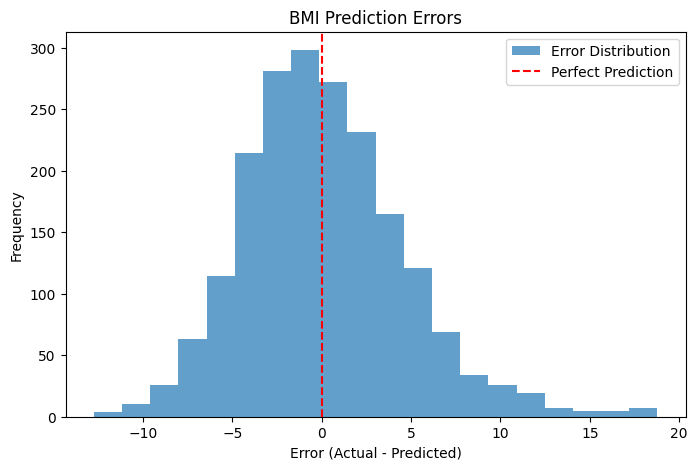

In [10]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Concatenate, Input
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_and_preprocess_images(image_folder, target_size=(128, 128), limit=None):
    images, ids = [], []
    image_files = sorted(os.listdir(image_folder))
    if limit:
        image_files = image_files[:limit]
    for img_name in tqdm(image_files, desc=f"Loading images from {image_folder}"):
        img_path = os.path.join(image_folder, img_name)
        try:
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            ids.append(img_name.split('.')[0])  # Extract ID from filename
        except Exception as e:
            # Log and skip errors without halting the process
            #print(f"Warning: Skipping image {img_name} due to error: {e}")
            print("Done Successfully")
    return np.array(images), ids

# Load images
front_images, front_ids = load_and_preprocess_images("/kaggle/input/prml-project/front/front", target_size=(128, 128), limit=10000)
side_images, side_ids = load_and_preprocess_images("/kaggle/input/prml-project/side/side", target_size=(128, 128), limit=10000)

# Load metadata
marks_df = pd.read_csv("/kaggle/input/prml-project/bmi.csv")

# Align images and metadata based on common IDs
common_ids = set(front_ids) & set(side_ids) & set(marks_df["ID"].astype(str))
marks_df = marks_df[marks_df["ID"].astype(str).isin(common_ids)].reset_index(drop=True)
front_images = np.array([front_images[front_ids.index(str(_id))] for _id in marks_df["ID"]])
side_images = np.array([side_images[side_ids.index(str(_id))] for _id in marks_df["ID"]])

# Categorize BMI into grades
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    else:
        return "Overweight"

marks_df["BMI_Grade"] = marks_df["BMI"].apply(categorize_bmi)

# Split data
bmi_labels = marks_df["BMI"].values
gender_labels = pd.get_dummies(marks_df["Sex:"].values)  # Adjust "Sex:" column name as needed
X_train_front, X_test_front, y_train_bmi, y_test_bmi = train_test_split(front_images, bmi_labels, test_size=0.2, random_state=42)
X_train_side, X_test_side = train_test_split(side_images, test_size=0.2, random_state=42)
_, _, y_train_gender, y_test_gender = train_test_split(front_images, gender_labels, test_size=0.2, random_state=42)

# Build BMI Prediction Model
def build_bmi_model(input_shape):
    input_front = Input(shape=input_shape, name="Input_front")
    input_side = Input(shape=input_shape, name="Input_side")
    base_model = ResNet50(include_top=False, input_shape=input_shape, pooling='avg', weights='imagenet')
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    front_features = base_model(input_front)
    side_features = base_model(input_side)
    merged = Concatenate()([front_features, side_features])
    x = Dense(64, activation='relu')(merged)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='linear', name="BMI_Output")(x)
    model = Model(inputs=[input_front, input_side], outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train models
bmi_model = build_bmi_model(X_train_front[0].shape)

bmi_model.fit([X_train_front, X_train_side], y_train_bmi, validation_data=([X_test_front, X_test_side], y_test_bmi),
              epochs=5, batch_size=16, callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

# Function to calculate BMI accuracy
def calculate_bmi_accuracy(actual_bmi, predicted_bmi):
    actual_grades = [categorize_bmi(bmi) for bmi in actual_bmi]
    predicted_grades = [categorize_bmi(bmi) for bmi in predicted_bmi.flatten()]
    correct = sum(1 for a, p in zip(actual_grades, predicted_grades) if a == p)
    accuracy = correct / len(actual_bmi) * 100
    return accuracy

# Evaluate BMI Model
y_pred_bmi = bmi_model.predict([X_test_front, X_test_side])
print("BMI Metrics:")
print("MAE:", mean_absolute_error(y_test_bmi, y_pred_bmi))
print("MSE:", mean_squared_error(y_test_bmi, y_pred_bmi))
print("R2 Score:", r2_score(y_test_bmi, y_pred_bmi))
print("Pearson Correlation:", pearsonr(y_test_bmi, y_pred_bmi.flatten())[0])

# Calculate BMI Accuracy
bmi_accuracy = calculate_bmi_accuracy(y_test_bmi, y_pred_bmi)
print(f"BMI Accuracy: {bmi_accuracy:.2f}%")

# Predict and Grade BMI
y_pred_grades = [categorize_bmi(bmi) for bmi in y_pred_bmi.flatten()]
marks_df_test = marks_df.iloc[:10]
results_df = pd.DataFrame({
    "id": marks_df_test["ID"],
    "Actual BMI": y_test_bmi[:10],
    "Predicted BMI": y_pred_bmi.flatten()[:10],
    "BMI Grade": y_pred_grades[:10],
})
print(results_df)

# Plot BMI Prediction Errors
plt.figure(figsize=(8, 5))
plt.hist(y_test_bmi - y_pred_bmi.flatten(), bins=20, alpha=0.7, label='Error Distribution')
plt.axvline(0, color='r', linestyle='--', label='Perfect Prediction')
plt.title('BMI Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


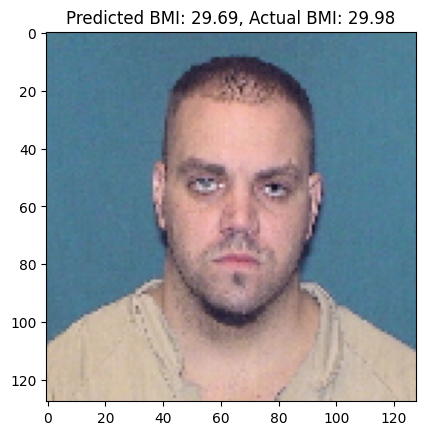

In [11]:
from matplotlib.pyplot import imshow
idx = 0  # Change to view different test samples
imshow(X_test_front[idx])
plt.title(f"Predicted BMI: {y_pred_bmi[idx][0]:.2f}, Actual BMI: {y_test_bmi[idx]:.2f}")
plt.show()


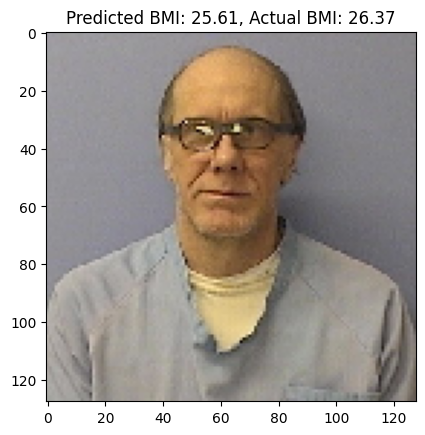

In [12]:
from matplotlib.pyplot import imshow
idx = 3  # Change to view different test samples
imshow(X_test_front[idx])
plt.title(f"Predicted BMI: {y_pred_bmi[idx][0]:.2f}, Actual BMI: {y_test_bmi[idx]:.2f}")
plt.show()


In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
from tqdm import tqdm

# Path to new data
new_front_folder = "/kaggle/input/front-h"
new_side_folder = "/kaggle/input/side-h"

# Function to preprocess new images
def preprocess_new_images(image_folder, target_size=(128, 128)):
    images, ids = [], []
    image_files = sorted(os.listdir(image_folder))
    for img_name in tqdm(image_files, desc=f"Loading images from {image_folder}"):
        img_path = os.path.join(image_folder, img_name)
        try:
            img = load_img(img_path, target_size=target_size)  # Resize to model input size
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            ids.append(img_name.split('.')[0])  # Extract ID from filename
        except Exception as e:
            print(f"Error processing {img_name}: {e}")
    return np.array(images), ids

# Load and preprocess front and side images
new_front_images, new_front_ids = preprocess_new_images(new_front_folder, target_size=(128, 128))
new_side_images, new_side_ids = preprocess_new_images(new_side_folder, target_size=(128, 128))


Loading images from /kaggle/input/side-h: 100%|██████████| 1/1 [00:00<00:00, 55.17it/s]


In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
from tqdm import tqdm

# Paths to new front and side images
new_front_folder = "/kaggle/input/front-h"
new_side_folder = "/kaggle/input/side-h"

# Function to preprocess images
def preprocess_images(image_folder, target_size=(128, 128)):
    images = []
    image_files = sorted(os.listdir(image_folder))  # Ensure consistent ordering
    for img_name in tqdm(image_files, desc=f"Loading images from {image_folder}"):
        img_path = os.path.join(image_folder, img_name)
        try:
            img = load_img(img_path, target_size=target_size)  # Resize to match model input size
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_name}: {e}")
    return np.array(images), image_files  # Return filenames for reference

# Load new front and side images
new_front_images, new_front_filenames = preprocess_images(new_front_folder, target_size=(128, 128))
new_side_images, new_side_filenames = preprocess_images(new_side_folder, target_size=(128, 128))


Loading images from /kaggle/input/side-h: 100%|██████████| 1/1 [00:00<00:00, 79.62it/s]


In [16]:
# Predict BMI using the trained model
new_pred_bmi = bmi_model.predict([new_front_images, new_side_images])

# Convert BMI to grades
new_pred_grades = [categorize_bmi(bmi) for bmi in new_pred_bmi.flatten()]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [17]:
# Combine filenames with predictions
results = [{"Front Image": front_file, "Side Image": side_file, "Predicted BMI": bmi, "BMI Grade": grade}
           for front_file, side_file, bmi, grade in zip(new_front_filenames, new_side_filenames, new_pred_bmi.flatten(), new_pred_grades)]

# Print the first 10 results
for result in results[:10]:
    print(result)


{'Front Image': 'front_H.jpg', 'Side Image': 'side_H.jpg', 'Predicted BMI': 28.79999, 'BMI Grade': 'Overweight'}


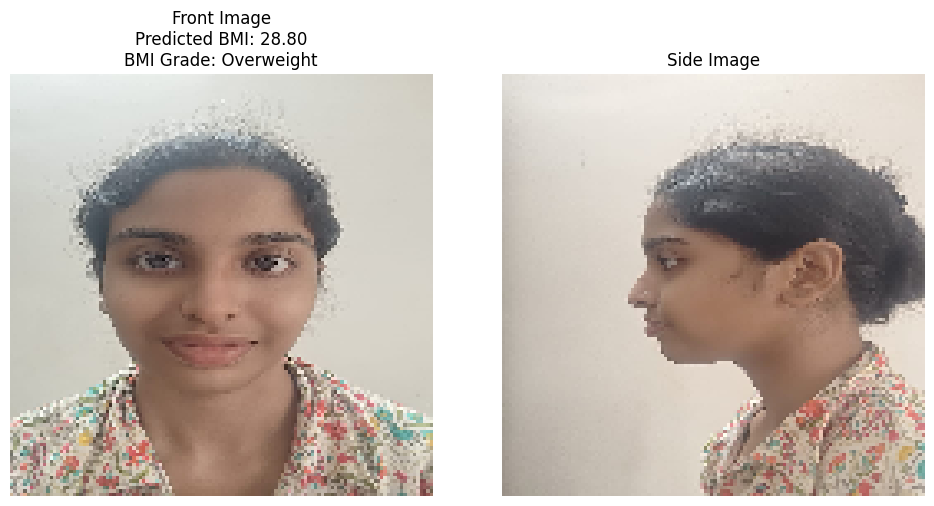

In [18]:
import matplotlib.pyplot as plt

# Plot an example
idx = 0  # Change the index to view different samples
plt.figure(figsize=(10, 5))

# Display front image
plt.subplot(1, 2, 1)
plt.imshow(new_front_images[idx])
plt.axis('off')
plt.title(f"Front Image\nPredicted BMI: {new_pred_bmi[idx][0]:.2f}\nBMI Grade: {new_pred_grades[idx]}")

# Display side image
plt.subplot(1, 2, 2)
plt.imshow(new_side_images[idx])
plt.axis('off')
plt.title(f"Side Image")

plt.tight_layout()
plt.show()


In [56]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
from tqdm import tqdm

# Paths to new front and side images
new_front_folder = "/kaggle/input/front-s"
new_side_folder = "/kaggle/input/side-s"

# Function to preprocess images
def preprocess_images(image_folder, target_size=(128, 128)):
    images = []
    image_files = sorted(os.listdir(image_folder))  # Ensure consistent ordering
    for img_name in tqdm(image_files, desc=f"Loading images from {image_folder}"):
        img_path = os.path.join(image_folder, img_name)
        try:
            img = load_img(img_path, target_size=target_size)  # Resize to match model input size
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_name}: {e}")
    return np.array(images), image_files  # Return filenames for reference

# Load new front and side images
new_front_images, new_front_filenames = preprocess_images(new_front_folder, target_size=(128, 128))
new_side_images, new_side_filenames = preprocess_images(new_side_folder, target_size=(128, 128))


Loading images from /kaggle/input/side-s: 100%|██████████| 1/1 [00:00<00:00, 33.55it/s]


In [57]:
# Predict BMI using the trained model
new_pred_bmi = bmi_model.predict([new_front_images, new_side_images])

# Convert BMI to grades
new_pred_grades = [categorize_bmi(bmi) for bmi in new_pred_bmi.flatten()]
# Combine filenames with predictions
results = [{"Front Image": front_file, "Side Image": side_file, "Predicted BMI": bmi, "BMI Grade": grade}
           for front_file, side_file, bmi, grade in zip(new_front_filenames, new_side_filenames, new_pred_bmi.flatten(), new_pred_grades)]

# Print the first 10 results
for result in results[:10]:
    print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
{'Front Image': 'Front_S.jpg', 'Side Image': 'Side_S.jpg', 'Predicted BMI': 26.602331, 'BMI Grade': 'Overweight'}


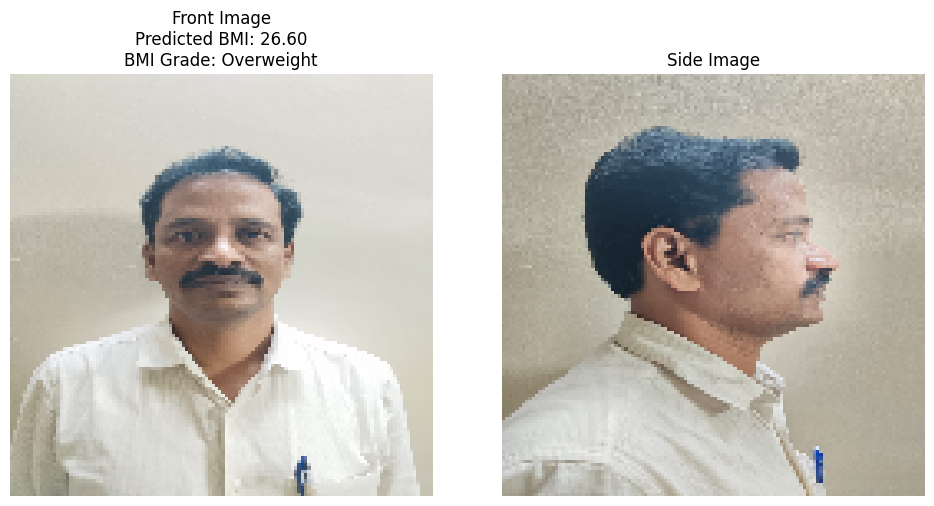

In [58]:
import matplotlib.pyplot as plt

# Plot an example
idx = 0  # Change the index to view different samples
plt.figure(figsize=(10, 5))

# Display front image
plt.subplot(1, 2, 1)
plt.imshow(new_front_images[idx])
plt.axis('off')
plt.title(f"Front Image\nPredicted BMI: {new_pred_bmi[idx][0]:.2f}\nBMI Grade: {new_pred_grades[idx]}")

# Display side image
plt.subplot(1, 2, 2)
plt.imshow(new_side_images[idx])
plt.axis('off')
plt.title(f"Side Image")

plt.tight_layout()
plt.show()


62/62 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step


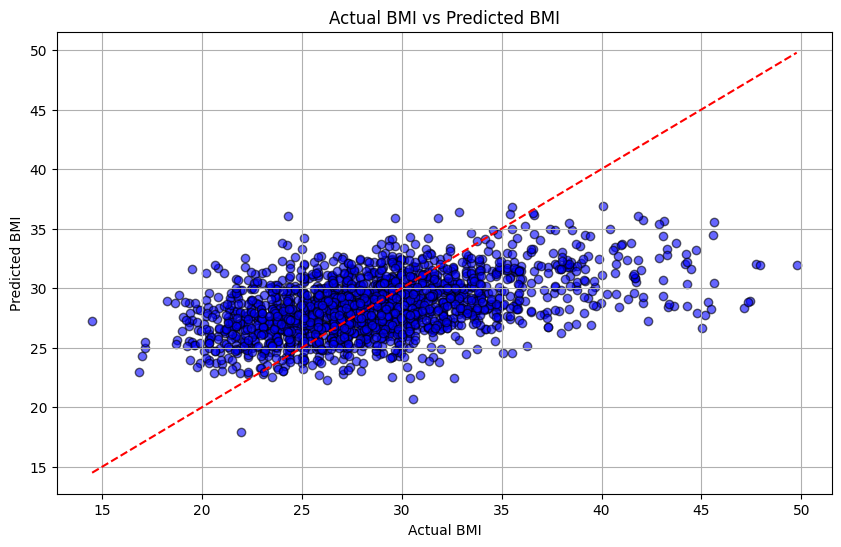

In [19]:
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred_bmi = bmi_model.predict([X_test_front, X_test_side])

# Plot actual vs predicted BMI
plt.figure(figsize=(10, 6))
plt.scatter(y_test_bmi, y_pred_bmi, color='blue', alpha=0.6, edgecolor='k')
plt.plot([min(y_test_bmi), max(y_test_bmi)], [min(y_test_bmi), max(y_test_bmi)], color='red', linestyle='--')
plt.title('Actual BMI vs Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.grid(True)
plt.show()


In [20]:
def build_gender_model(input_shape):
    input_front = Input(shape=input_shape, name="Front_input")
    input_side = Input(shape=input_shape, name="Side_input")
    base_model = ResNet50(include_top=False, input_shape=input_shape, pooling='avg', weights='imagenet')
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    front_features = base_model(input_front)
    side_features = base_model(input_side)
    merged = Concatenate()([front_features, side_features])
    x = Dense(64, activation='relu')(merged)
    x = Dropout(0.3)(x)
    output = Dense(gender_labels.shape[1], activation='softmax', name="Gender_Output")(x)
    model = Model(inputs=[input_front, input_side], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
gender_labels = pd.get_dummies(marks_df["Sex:"].values)  # Adjust "Sex:" column name as needed
X_train_front, X_test_front, y_train_bmi, y_test_bmi = train_test_split(front_images, bmi_labels, test_size=0.2, random_state=42)
X_train_side, X_test_side = train_test_split(side_images, test_size=0.2, random_state=42)
_, _, y_train_gender, y_test_gender = train_test_split(front_images, gender_labels, test_size=0.2, random_state=42)

gender_model = build_gender_model(X_train_front[0].shape)
gender_model.fit([X_train_front, X_train_side], y_train_gender, validation_data=([X_test_front, X_test_side], y_test_gender),
                 epochs=10, batch_size=16, callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

Epoch 1/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 643s 1s/step - accuracy: 0.9688 - loss: 0.1266 - val_accuracy: 0.9767 - val_loss: 0.1441
Epoch 2/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 658s 1s/step - accuracy: 0.9782 - loss: 0.0926 - val_accuracy: 0.9767 - val_loss: 0.1105
Epoch 3/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 603s 1s/step - accuracy: 0.9780 - loss: 0.0777 - val_accuracy: 0.9767 - val_loss: 0.0678
Epoch 4/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.9768 - loss: 0.0675 - val_accuracy: 0.9767 - val_loss: 0.1085
Epoch 5/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 636s 1s/step - accuracy: 0.9777 - loss: 0.0631 - val_accuracy: 0.9767 - val_loss: 0.0874


In [22]:
# Evaluate the model on the test set
test_loss, test_metrics = gender_model.evaluate(
    [X_test_front, X_test_side], 
    y_test_gender
)

print(f"Test Loss: {test_loss}")
print(f"Test Metrics: {test_metrics}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9716 - loss: 0.0861
Test Loss: 0.06784792244434357
Test Metrics: 0.9766616225242615


In [31]:
# Convert predictions to class indices
predicted_labels = predictions.argmax(axis=1)

# Ensure y_test_gender is also class indices (not one-hot encoded)
if len(y_test_gender.shape) > 1 and y_test_gender.shape[1] > 1:
    y_test_gender = y_test_gender.argmax(axis=1)

# Print classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_gender, predicted_labels, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        46
           1       0.98      1.00      0.99      1925

    accuracy                           0.98      1971
   macro avg       0.99      0.50      0.49      1971
weighted avg       0.98      0.98      0.97      1971



In [33]:
# Make predictions on the test set
predictions = gender_model.predict([X_test_front, X_test_side])

# Convert predictions to labels
#predicted_labels = (predictions > 0.5).astype(int)  # For sigmoid activation
predicted_labels = predictions.argmax(axis=1)    # For softmax activation

# Optionally, if you need to evaluate prediction performance:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test_gender, predicted_labels, zero_division=1))


62/62 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        46
           1       0.98      1.00      0.99      1925

    accuracy                           0.98      1971
   macro avg       0.99      0.50      0.49      1971
weighted avg       0.98      0.98      0.97      1971



In [34]:
# Convert one-hot encoded labels to class labels
if y_test_gender.ndim > 1:
    y_test_gender = np.argmax(y_test_gender, axis=1)

# Print class distribution
print("Distribution in y_test_gender:")
print(pd.Series(y_test_gender).value_counts())


Distribution in y_test_gender:
1    1925
0      46
Name: count, dtype: int64


In [35]:
print("Distribution of predicted labels:")
print(pd.Series(predicted_labels.flatten()).value_counts())


Distribution of predicted labels:
1    1971
Name: count, dtype: int64


In [36]:
from sklearn.metrics import f1_score

# Weighted F1-score, takes class imbalance into account
print(f"Weighted F1 Score: {f1_score(y_test_gender, predicted_labels, average='weighted')}")
# Print accuracy score if binary classification
print(f"Accuracy: {accuracy_score(y_test_gender, predicted_labels)}")

Weighted F1 Score: 0.9651301677194057
Accuracy: 0.9766615930999493


In [37]:
from PIL import Image
import numpy as np

# Define the paths to your new images
path_to_new_image_front = '/kaggle/input/front-h/front_H.jpg'
path_to_new_image_side = '/kaggle/input/side-h/side_H.jpg'

# Load and preprocess the images
image_front = Image.open(path_to_new_image_front).resize((224, 224))
image_side = Image.open(path_to_new_image_side).resize((224, 224))

# Convert images to numpy arrays and normalize
X_front_new = np.array(image_front) / 255.0
X_side_new = np.array(image_side) / 255.0

# Expand dimensions to match model input shape
X_front_new = np.expand_dims(X_front_new, axis=0)
X_side_new = np.expand_dims(X_side_new, axis=0)

# Make predictions with the trained model
predictions = gender_model.predict([X_front_new, X_side_new])

# Print predictions
print("Predictions:", predictions)

# Convert probabilities to class labels
predicted_labels = (predictions > 0.5).astype(int)
print("Predicted Labels:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Predictions: [[2.9361658e-07 9.9999976e-01]]
Predicted Labels: [[0 1]]


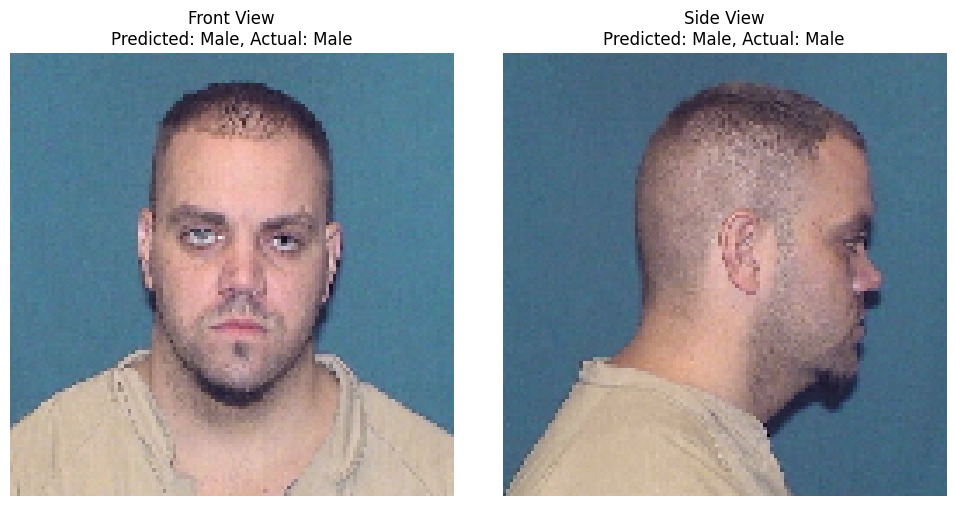

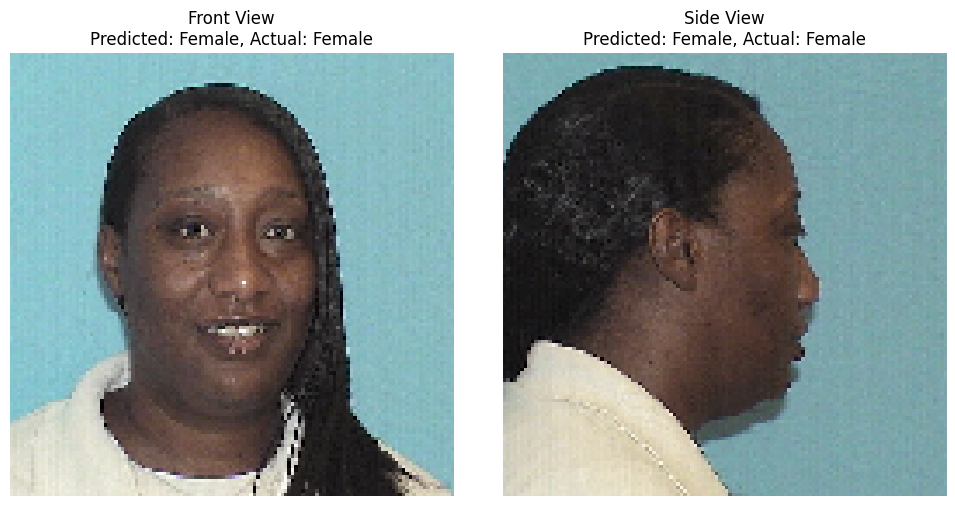

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Convert one-hot encoded y_test_gender to single-class labels if necessary
if len(y_test_gender.shape) > 1 and y_test_gender.shape[1] > 1:
    y_test_gender = y_test_gender.argmax(axis=1)

# Flatten predicted_labels if necessary
predicted_labels = predicted_labels.flatten()

# Plot the first few test samples
for i in range(2):  # Adjust the range for more/less samples
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a side-by-side layout

    # Display the front image
    axes[0].imshow(X_test_front[i])
    predicted_gender = 'Female' if predicted_labels[i] == 1 else 'Male'
    actual_gender = 'Male' if y_test_gender[i] == 1 else 'Female'
    axes[0].set_title(f"Front View\nPredicted: {predicted_gender}, Actual: {actual_gender}")
    axes[0].axis('off')

    # Display the side image
    axes[1].imshow(X_test_side[i])
    predicted_gender = 'Female' if predicted_labels[i] == 1 else 'Male'
    actual_gender = 'Male' if y_test_gender[i] == 1 else 'Female'
    axes[1].set_title(f"Side View\nPredicted: {predicted_gender}, Actual: {actual_gender}")
    axes[1].axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Predictions: [[2.9361658e-07 9.9999976e-01]]
Predicted Gender: Female


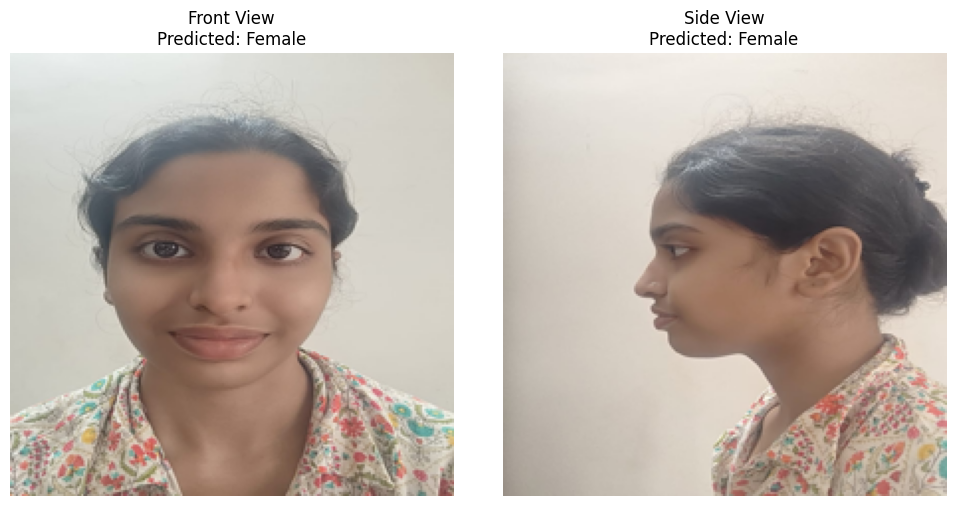

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your new images
path_to_new_image_front = '/kaggle/input/front-h/front_H.jpg'
path_to_new_image_side = '/kaggle/input/side-h/side_H.jpg'

# Load and preprocess the images
image_front = Image.open(path_to_new_image_front).resize((224, 224))
image_side = Image.open(path_to_new_image_side).resize((224, 224))

# Convert images to numpy arrays and normalize
X_front_new = np.array(image_front) / 255.0
X_side_new = np.array(image_side) / 255.0

# Expand dimensions to match model input shape
X_front_new = np.expand_dims(X_front_new, axis=0)
X_side_new = np.expand_dims(X_side_new, axis=0)

# Make predictions with the trained model
predictions = gender_model.predict([X_front_new, X_side_new])

# Display the raw predictions
print("Predictions:", predictions)

# Convert predictions to class labels (e.g., 0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Map numeric predictions to gender labels
label_map = {0: "Female", 1: "Male"}
predicted_gender = label_map[predicted_labels[0][0]]

# Print the predicted gender
print("Predicted Gender:", predicted_gender)

# Display the images with the predicted gender
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(np.array(image_front))
axes[0].set_title(f"Front View\nPredicted: {predicted_gender}")
axes[0].axis('off')

axes[1].imshow(np.array(image_side))
axes[1].set_title(f"Side View\nPredicted: {predicted_gender}")
axes[1].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Predictions: [[7.086573e-07 9.999993e-01]]
Predicted Gender: Male


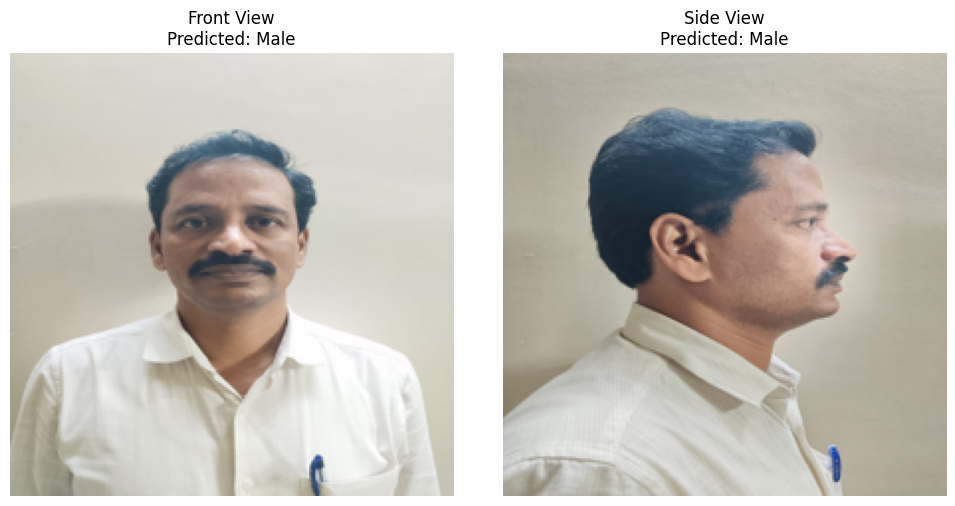

In [60]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your new images
path_to_new_image_front = '/kaggle/input/front-s/Front_S.jpg'
path_to_new_image_side = '/kaggle/input/side-s/Side_S.jpg'

# Load and preprocess the images
image_front = Image.open(path_to_new_image_front).resize((224, 224))
image_side = Image.open(path_to_new_image_side).resize((224, 224))

# Convert images to numpy arrays and normalize
X_front_new = np.array(image_front) / 255.0
X_side_new = np.array(image_side) / 255.0

# Expand dimensions to match model input shape
X_front_new = np.expand_dims(X_front_new, axis=0)
X_side_new = np.expand_dims(X_side_new, axis=0)

# Make predictions with the trained model
predictions = gender_model.predict([X_front_new, X_side_new])

# Display the raw predictions
print("Predictions:", predictions)

# Convert predictions to class labels (e.g., 0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Map numeric predictions to gender labels
label_map = {0: "Male", 1: "Female"}
predicted_gender = label_map[predicted_labels[0][0]]

# Print the predicted gender
print("Predicted Gender:", predicted_gender)

# Display the images with the predicted gender
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(np.array(image_front))
axes[0].set_title(f"Front View\nPredicted: {predicted_gender}")
axes[0].axis('off')

axes[1].imshow(np.array(image_side))
axes[1].set_title(f"Side View\nPredicted: {predicted_gender}")
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [70]:
# Check the shapes of the arrays
print("Shape of y_test_gender:", y_test_gender.shape)
print("Shape of predicted_labels_gender:", predicted_labels_gender.shape)

# Check the length of the arrays
print("Length of y_test_gender:", len(y_test_gender))
print("Length of predicted_labels_gender:", len(predicted_labels_gender))

# Flatten if necessary
y_test_gender = y_test_gender.flatten()
predicted_labels_gender = predicted_labels_gender.flatten()

# Check again after flattening
print("Shape of y_test_gender after flattening:", y_test_gender.shape)
print("Shape of predicted_labels_gender after flattening:", predicted_labels_gender.shape)


Shape of y_test_gender: (1971,)
Shape of predicted_labels_gender: (3942,)
Length of y_test_gender: 1971
Length of predicted_labels_gender: 3942
Shape of y_test_gender after flattening: (1971,)
Shape of predicted_labels_gender after flattening: (3942,)


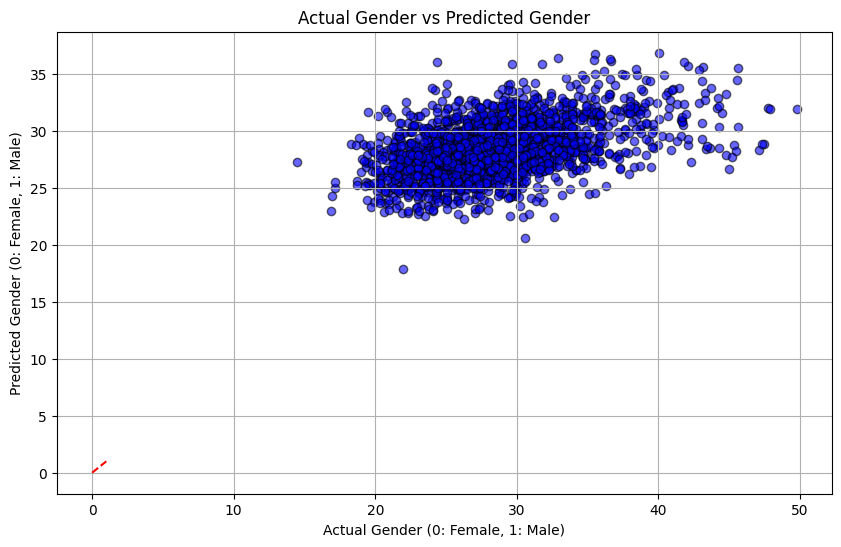

In [69]:
import matplotlib.pyplot as plt

# Get predictions for the test set
# Flatten if necessary
y_test_gender = y_test_gender.flatten()
predicted_labels_gender = predicted_labels_gender.flatten()

# Plot actual vs predicted BMI
plt.figure(figsize=(10, 6))
plt.scatter(y_test_bmi, y_pred_bmi, color='blue', alpha=0.6, edgecolor='k')
plt.plot([min(y_test_gender), max(y_test_gender)], [min(y_test_gender), max(y_test_gender)], color='red', linestyle='--')
plt.title('Actual Gender vs Predicted Gender')
plt.xlabel('Actual Gender (0: Female, 1: Male)')
plt.ylabel('Predicted Gender (0: Female, 1: Male)')
plt.grid(True)
plt.show()


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

# Assuming `y_test_bmi` and `y_pred_bmi` contain actual and predicted BMI values
mae = mean_absolute_error(y_test_bmi, y_pred_bmi)
mse = mean_squared_error(y_test_bmi, y_pred_bmi)
r2 = r2_score(y_test_bmi, y_pred_bmi)
pearson_corr, _ = pearsonr(y_test_bmi, y_pred_bmi.flatten())

print("BMI Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")


BMI Metrics:
MAE: 3.48
MSE: 20.29
R² Score: 0.21
Pearson Correlation Coefficient: 0.46


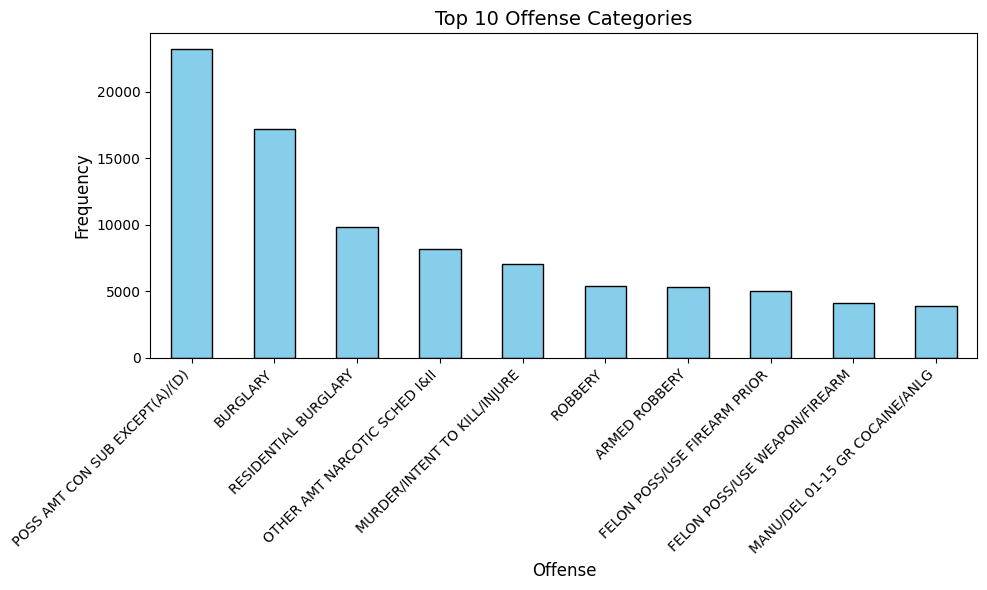

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file to inspect its contents
file_path = '/kaggle/input/sentensing-prml/sentencing.csv'
data = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataset to understand its structure
data.head()# Plot the distribution of offenses
plt.figure(figsize=(10, 6))
data['offense'].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Top 10 Offense Categories', fontsize=14)
plt.xlabel('Offense', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()